<a href="https://colab.research.google.com/github/Mun1991/car-price-prediction/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction-Data Science Project

**Importing Libraries**

All the libraries required for the entire project are imported at the start

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

warnings.filterwarnings('ignore')


# Data Understanding



> ***Data Collection***



In [7]:
# Uploading the dataset
from google.colab import files
uploaded = files.upload()


Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


Making a dataframe of the dataset so that I can view it in a tabular format.
The head function is used to view the first 5 rows of the entire dataframe

In [8]:
# Making a dataFrame from the csv
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
df.shape

(205, 25)

In [10]:
df.isnull().sum()

,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0
carlength,0


In [11]:
df.dtypes

,0
symboling,int64
CarName,object
fueltype,object
aspiration,object
doornumber,object
carbody,object
drivewheel,object
enginelocation,object
wheelbase,float64
carlength,float64




> ***Data cleaning***



To start the cleaning, I have to find the percentage of nulls and missing values. Based on the percentage if it is below 10% , the rows are dropped. However if we have 60-70% missing rows in a column that column is dropped. In the remaining cases various imputing technqiues are applied.

In [12]:
def print_null_percentage(df):
    # Calculate the percentage of null values in each column
    null_percentage = (df.isnull().sum() / len(df)) * 100

    # Print the results in a readable format
    print("Percentage of Null or Missing Values in Each Column:")
    for column, percentage in null_percentage.items():
        print(f"{column}: {percentage:.2f}%")


print_null_percentage(df)

Percentage of Null or Missing Values in Each Column:
symboling: 0.00%
CarName: 0.00%
fueltype: 0.00%
aspiration: 0.00%
doornumber: 0.00%
carbody: 0.00%
drivewheel: 0.00%
enginelocation: 0.00%
wheelbase: 0.00%
carlength: 0.00%
carwidth: 0.00%
carheight: 0.00%
curbweight: 0.00%
enginetype: 0.00%
cylindernumber: 0.00%
enginesize: 0.00%
fuelsystem: 0.00%
boreratio: 0.00%
stroke: 0.00%
compressionratio: 0.00%
horsepower: 0.00%
peakrpm: 0.00%
citympg: 0.00%
highwaympg: 0.00%
price: 0.00%


no nulls or missing values to drop

The column car name is incorrectly labelled, the data it contains consists of company names, hence it is replaced

In [13]:
# Correcting the column name
CompanyName=df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,'CompanyName',CompanyName)
df

,symboling,CarName,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,alfa-romero,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,audi,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,audi,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,volvo,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,volvo,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,volvo,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,volvo,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Now we get the general information about all the columns and apply correction where needed.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   CompanyName       205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

It is very obvious that door number and cylinder number are supposed to be numerical columns like float but instead they are of object type and hence need to be corrected

In [15]:
# changing data type
df['doornumber'] = df['doornumber'].replace({'four': 4, 'two': 2}).astype('int64')

df['cylindernumber'] = df['cylindernumber'].replace({'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'three': 3, 'twelve': 12}
                                                       ).astype('int64')

The column Company name had some spelling errors that need to be corrected. The incorrect spellings are replaced with the correct ones. This step is purely optional as it has no direct link with the results of regression

In [16]:
def replace_name(x,y):
    df['CompanyName'].replace(x,y,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [17]:
df['CompanyName'].value_counts() #to know the count of each manufacturer names

,count
CompanyName,
toyota,32
mazda,17
nissan,17
mitsubishi,13
honda,13
volkswagen,12
subaru,12
peugeot,11
volvo,11




> ***EDA***



Now to understand the data and also get a hint of feature importance we shall be conducting the EDA. EDA helps us to undertsand distributions and also the impacts of the columns on the target variable. We get an idea of what we are working with and apply the necessary techniques to avoid any bias that might be present in the data.

The shape function just displays the rows and columns respectively. We know the amount of data we shall be handling. Some models work best for smaller datasets while some do good for bigger.

In [18]:
df.shape

(205, 26)

We have 205 rows and 27 columns. It is a medium sized datasets with alot of features so feature engineering will be of utmost importance here. In a medium sized dataset like this simple linear regression will work quite well.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   CompanyName       205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

Now we want to get descriptive statistics about our dataset with the most focus on our target variable i.e. price

In [20]:
columns = ['price'] + [col for col in df.columns if col != 'price']
df_reordered = df[columns]

# Get descriptive statistics
df_reordered.describe()


,price,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,13276.710571,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220
std,7988.852332,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443
min,5118.000000,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,7788.000000,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,10295.000000,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,16503.000000,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,45400.000000,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


If we look at our target variable's descriptive statistics:
*  There are 205 non-null price values.
*  The average price is 13k, with a median (50%) of 10k, which means a right skew. As in there is a bias.
*  Prices range from 5k (min) to 45k (max), with a standard deviation of 8k, which means there is a lot of variability in the data.

All of this shows we need to apply normalization or transformation techniques.



> ***Features and their correlation***



If we focus on the target variable for now, we can see that price is postively correlated to horsepower ,curbweight which means these are directly correlated. While features like citympg, highwaympg are negatively correlated it means they are inversely realted.

Whereas features like symboling have no relation with the target column and can be dropped during the feature engineering step

**Box Plots**

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance,like symmetry, skew, variance, and outliers.

It is easy to see where the main bulk of the data is,the min max and so on. It makes it easier to compare.

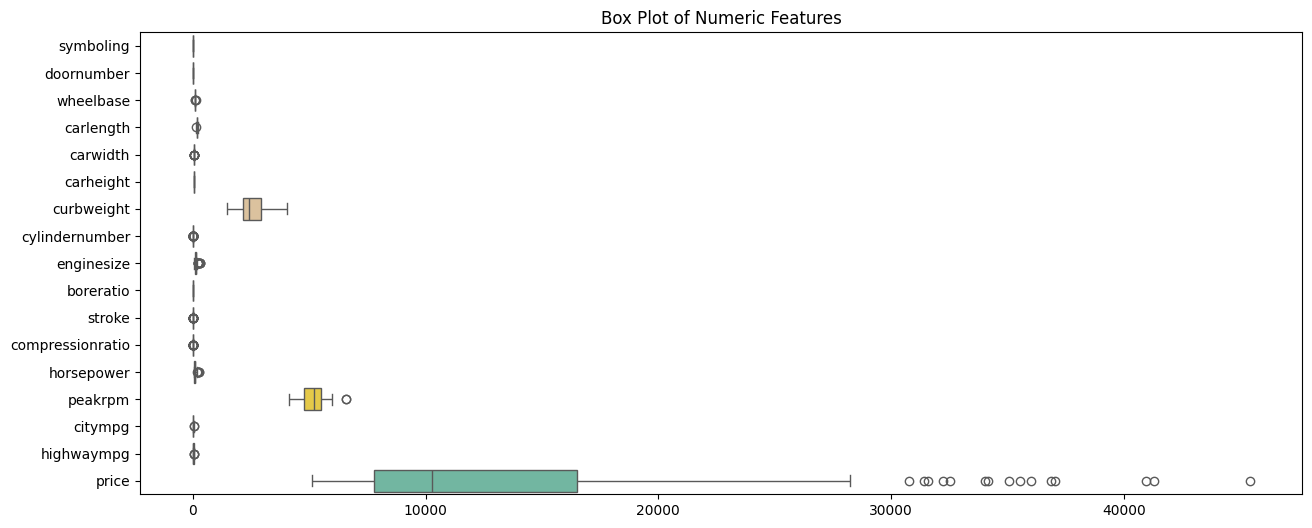

In [21]:
# Box plot for numeric features
plt.figure(figsize=(15, 6))
sns.boxplot(data=df.select_dtypes(include=np.number), orient="h", palette="Set2")
plt.title("Box Plot of Numeric Features")
plt.show()


The target column i.e price has some visible outliers and a large range. The others are very compact making them hard to read so we shall focus on the target column now

*Focus on the target columns  Price*

<Axes: title={'center': 'Car Price'}, ylabel='price'>

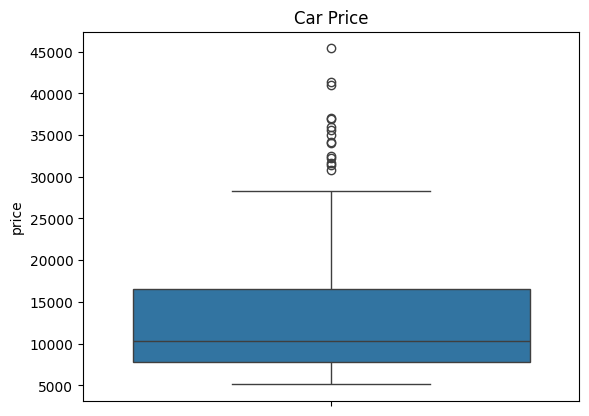

In [22]:
# Box plot
plt.title('Car Price')
sns.boxplot(y=df['price'])

Whiskers highlight the outliers where as the box represents the IQR, median is arounf 11k.

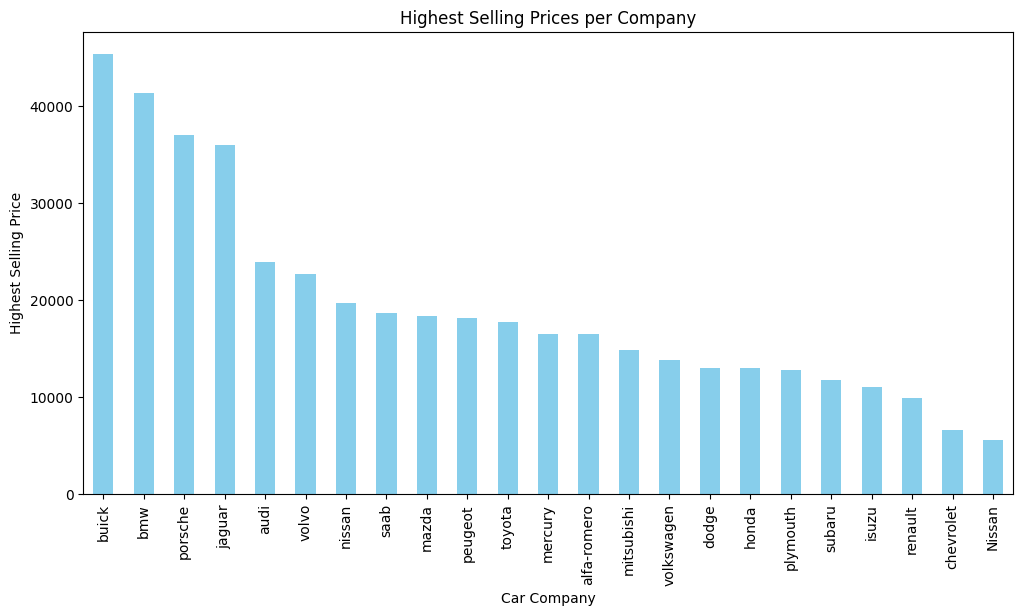

In [23]:
# Companies and their prices
max_price_per_company = df.groupby('CompanyName')['price'].max()

# Sort the values in descending order to display the highest prices
max_price_per_company_sorted = max_price_per_company.sort_values(ascending=False)

# Plot the highest prices per company
plt.figure(figsize=(12, 6))
max_price_per_company_sorted.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Highest Selling Prices per Company')
plt.xlabel('Car Company')
plt.ylabel('Highest Selling Price')
plt.xticks(rotation=90)
plt.show()

Buick BMW PORCHSE JAGUAR are the names of the car companies that are a luxury brand ans sells car for highest prices, among the rest

[Text(0.5, 0, 'Car company'), Text(0, 0.5, 'Frequency of company')]

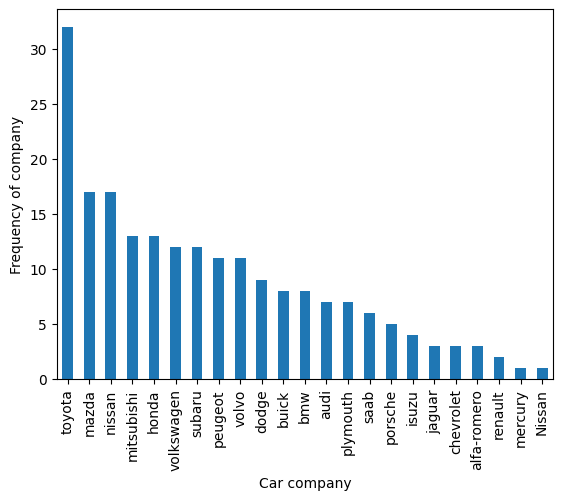

In [24]:
# Companies and their numbers of cars nmanufactured according to this dataset
companies=df['CompanyName'].value_counts().plot(kind='bar')
companies.set(xlabel = 'Car company', ylabel='Frequency of company')

But on the other hand, companies like toyota mazda nissan are the ones that make cars that are not too expensive and are affordable for the general public. Hence they are sold in the highest numbers, While the frequency of luxury cars like jaguar porsche are not much because they have high prices and cannot be afforded by many

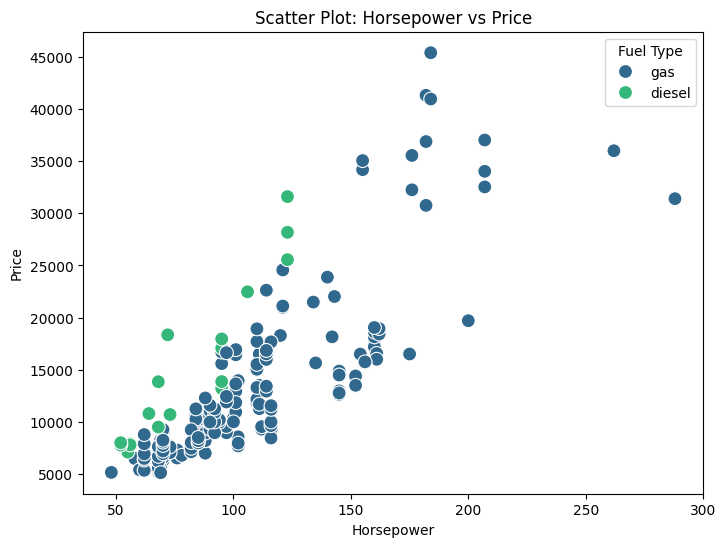

In [25]:
# Horsepower and price
plt.figure(figsize=(8, 6))
sns.scatterplot(x="horsepower", y="price", hue="fueltype", data=df, palette="viridis", s=100)
plt.title("Scatter Plot: Horsepower vs Price")
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.legend(title="Fuel Type")
plt.show()

This scatter plot shows the relationship between horsepower and price, with a positive correlation indicating that cars with higher horsepower are generally more expensive. Lower horsepower cars are usually gas based, according to this dataset. But the main feature here is horsepower.

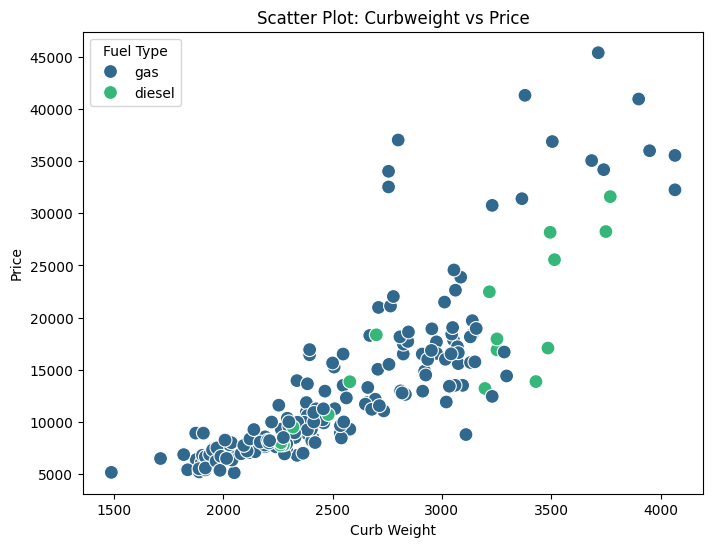

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="curbweight", y="price", hue="fueltype", data=df, palette="viridis", s=100)
plt.title("Scatter Plot: Curbweight vs Price")
plt.xlabel("Curb Weight")
plt.ylabel("Price")
plt.legend(title="Fuel Type")
plt.show()


This scatter plot shows that vehicles with higher curb weight have higher prices and vice versa. Moreover most of the low curb weight cars are gas based, but the main feature here is curb weight

# Correlations

# Correlations
Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate).

The Pearson correlation coefficient (r) is the most common way of measuring a linear correlation. It is a number between –1 and 1 that measures the strength and direction of the relationship between two variables.

# HEAT MAP

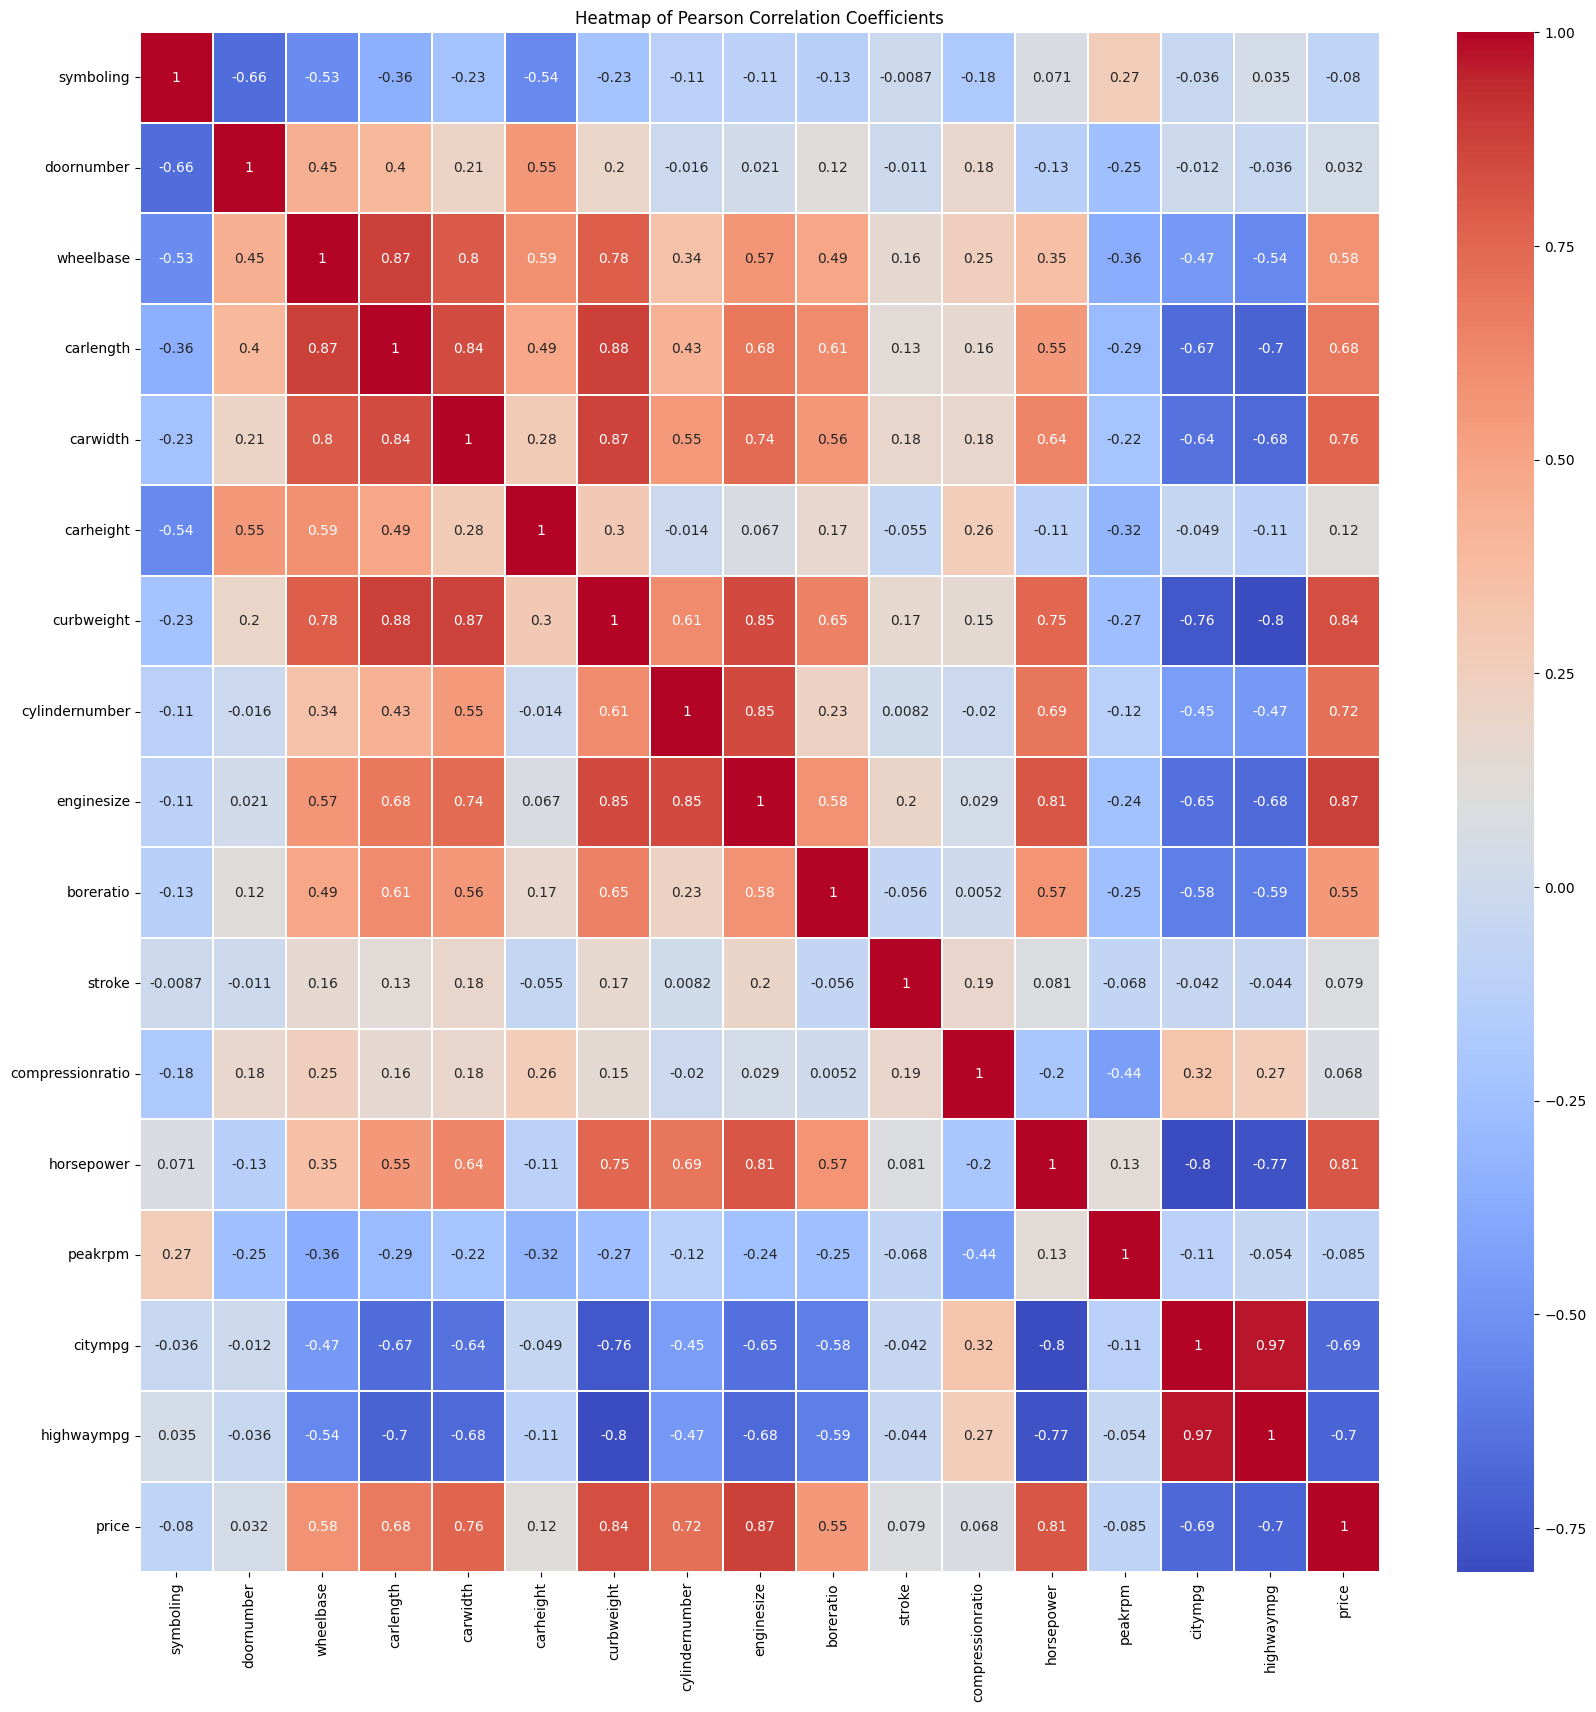

In [27]:
# Correlation heatmap
data_corr=df.select_dtypes(include=['int64','float64']).corr()
plt.figure(figsize=(20,20))
sns.heatmap(data_corr,annot=True,cmap='coolwarm', linewidths=0.01)
plt.title('Heatmap of Pearson Correlation Coefficients')
plt.show()







1. Strong Positive Correlation (Correlation > 0.6)
These features are highly predictive of the price:

enginesize (0.87)
curbweight (0.84)
horsepower (0.81)
carwidth (0.76)
cylindernumber (0.72)
carlength (0.68)
wheelbase (0.58)
boreratio (0.55)

2. Strong Negative Correlation (Correlation < -0.5)
These features have an inverse relationship with price:

highwaympg (-0.7)
citympg (-0.69)


3. Weak Positive Correlation (0 < Correlation ≤ 0.3)
These features are weakly related to price and can be dropped


carheight (0.12)
stroke (0.079)



4. Weak Negative Correlation (-0.3 ≤ Correlation < 0)
These features have a slight negative relationship with price:

car_ID (-0.11)
symboling (-0.08)
peakrpm (-0.085)


5. No Significant Correlation (Near Zero Correlation)
These features are essentially uncorrelated with price and have minimal impact and can be dropped:

doornumber (0.032)
compressionratio (0.068)


In statistics, the Pearson correlation coefficient (PCC) is a correlation coefficient that measures linear correlation between two sets of data.

This will help us realise that exactly which columns have strong relations with the target variable and which features have weak correlations. They can be dropped during the feature engineering step

A p-value measures the probability of obtaining the observed results, assuming that the null hypothesis is true9A null hypothesis is a type of statistical hypothesis that proposes that no statistical significance exists in a set of given observations.). The lower the p-value, the greater the statistical significance of the observed difference. A p-value of 0.05 or lower is generally considered statistically significant.

In [28]:
# Compute Pearson correlation coefficient and p-value for price and other numeric variables
target_col = 'price'
results = []  # List to hold results

# Loop through numeric columns and calculate Pearson correlation and p-value
for col in df.select_dtypes(include=np.number).columns:
    if col != target_col:
        corr, p_val = pearsonr(df[col], df[target_col])
        results.append({"Feature": col, "Pearson Correlation": corr, "P-value": p_val})


correlation_df = pd.DataFrame(results)
print(correlation_df)


             Feature  Pearson Correlation       P-value
0          symboling            -0.079978  2.543118e-01
1         doornumber             0.031835  6.504484e-01
2          wheelbase             0.577816  1.182820e-19
3          carlength             0.682920  1.678707e-29
4           carwidth             0.759325  9.627438e-40
5          carheight             0.119336  8.832832e-02
6         curbweight             0.835305  1.214445e-54
7     cylindernumber             0.718305  8.028863e-34
8         enginesize             0.874145  1.354764e-65
9          boreratio             0.553173  7.907922e-18
10            stroke             0.079443  2.575137e-01
11  compressionratio             0.067984  3.327724e-01
12        horsepower             0.808139  1.483437e-48
13           peakrpm            -0.085267  2.241412e-01
14           citympg            -0.685751  7.978684e-30
15        highwaympg            -0.697599  3.230681e-31


Pearson correlation shows the strength and direction of the relationship: positive (e.g., enginesize, 0.87) or negative (e.g., citympg, -0.69).
P-value indicates the statistical significance of the correlation; values less than 0.05 suggest the correlation is significant. Features like enginesize and curbweight are highly correlated and statistically significant, while others (e.g., doornumber) show weak or insignificant correlations.

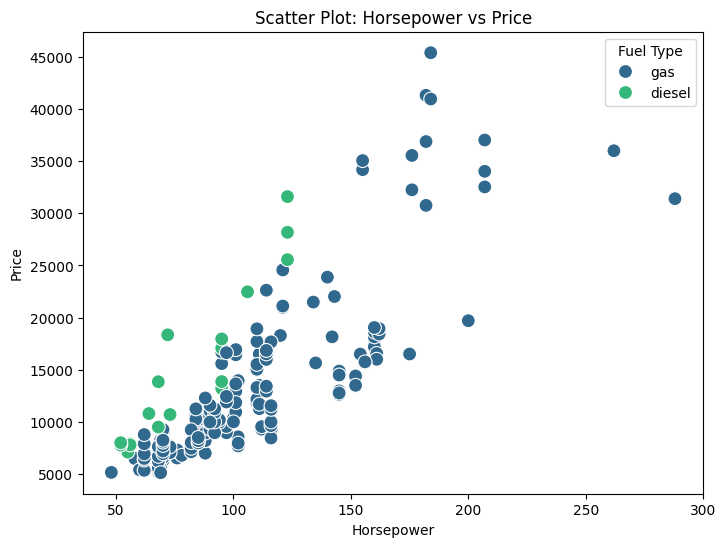

In [29]:
# Scatter plot of Horsepower vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x="horsepower", y="price", hue="fueltype", data=df, palette="viridis", s=100)
plt.title("Scatter Plot: Horsepower vs Price")
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.legend(title="Fuel Type")
plt.show()


# Encoding for categorical columns

Models require numerical columns for training, hence the categorical columns are encoded to transform them into numerical ones so that they can be used while training

In [30]:
def apply_label_encoding(df):
    # Identify categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    print(f"Categorical Columns: {categorical_cols}")

    # Initialize the LabelEncoder
    label_encoders = {}

    # Apply Label Encoding
    for col in categorical_cols:
        print(f"Applying Label Encoding on: {col}")
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])
        label_encoders[col] = label_encoder

    return df, label_encoders


# Apply label encoding to categorical columns in df
df, encoders = apply_label_encoding(df)

print("\nEncoded DataFrame:")
print(df.head())

print("\nLabel Encoders:")
for col, encoder in encoders.items():
    print(f"{col}: {list(encoder.classes_)}")


Categorical Columns: Index(['CarName', 'fueltype', 'CompanyName', 'aspiration', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem'],
      dtype='object')
Applying Label Encoding on: CarName
Applying Label Encoding on: fueltype
Applying Label Encoding on: CompanyName
Applying Label Encoding on: aspiration
Applying Label Encoding on: carbody
Applying Label Encoding on: drivewheel
Applying Label Encoding on: enginelocation
Applying Label Encoding on: enginetype
Applying Label Encoding on: fuelsystem

Encoded DataFrame:
   symboling  CarName  fueltype  CompanyName  aspiration  doornumber  carbody  \
0          3        2         1            1           0           2        0   
1          3        3         1            1           0           2        0   
2          1        1         1            1           0           2        2   
3          2        4         1            2           0           4        3   
4          2        5         1            2  

: CarName
: CompanyName
: fueltype
: aspiration
: carbody
: drivewheel
: enginelocation
: enginetype
: fuelsystem

are the columns that required label encoding.
Label encoding assigns a unique integer to each category, preserving the ordinal relationships between categories but not the magnitude of those relationships.

*Feature Engineering*

All the columns that we pointed out during EDA step and as well as in correlations (had no relation to the target column ) are dropped during this phase

In [31]:

# Drop weakly correlated columns
# Define the threshold for weak p-value (commonly 0.05)
threshold_p_value = 0.05

# Identify the columns with weak p-values
weak_p_cols = correlation_df[correlation_df['P-value'] > threshold_p_value]['Feature'].tolist()

# Drop those columns from the original DataFrame
df_cleaned = df.drop(columns=weak_p_cols)

print(f"Columns dropped: {weak_p_cols}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")



Columns dropped: ['symboling', 'doornumber', 'carheight', 'stroke', 'compressionratio', 'peakrpm']
Cleaned dataset shape: (205, 20)


# Outlier Removal

During the box plots in the EDA step we realised that we have some outliers, we calculate z scores to pinpoint the rows of outliers as it can pose bias in the modelling step and those rows can be dropped, as it is done. Dataset reduced from 205 to 115

In [32]:

# Calculate Z-scores for the entire DataFrame
z_scores = zscore(df_cleaned.select_dtypes(include=np.number))

# Define a threshold for Z-score to identify outliers
threshold = 2
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Remove the rows where any of the features exceed the threshold
df_cleaned_z = df_cleaned[~outliers.any(axis=1)]

print(f"Original dataset size: {df_cleaned.shape[0]}")
print(f"Cleaned dataset size: {df_cleaned_z.shape[0]}")

Original dataset size: 205
Cleaned dataset size: 115


# Standardization

Standardizing data helps to avoid undue influence from features with larger values, it also normalizes the data. Helps narrow down the impact of outliers on the model.


So continous numerical columns are picked and standard scaler is applied to them

In [33]:
continuous_columns = ['curbweight', 'enginesize', 'horsepower', 'carwidth', 'citympg', 'highwaympg']

# Apply standardization to continuous columns
scaler = StandardScaler()
df_cleaned_z[continuous_columns] = scaler.fit_transform(df_cleaned_z[continuous_columns])

# Display the cleaned and standardized dataset
print(df_cleaned_z.head())


    CarName  fueltype  CompanyName  aspiration  carbody  drivewheel  \
3         4         1            2           0        3           1   
5         9         1            2           0        3           1   
10       10         1            3           0        3           2   
11       10         1            3           0        3           2   
12       11         1            3           0        3           2   

    enginelocation  wheelbase  carlength  carwidth  curbweight  enginetype  \
3                0       99.8      176.6  0.719766   -0.009999           3   
5                0       99.8      177.3  0.790091    0.452139           3   
10               0      101.2      176.8 -0.264791    0.147671           3   
11               0      101.2      176.8 -0.264791    0.147671           3   
12               0      101.2      176.8 -0.264791    1.003985           3   

    cylindernumber  enginesize  fuelsystem  boreratio  horsepower   citympg  \
3                4   -0.2

# Model Training

Now we shall split the dataset into training and testing. We used a 80--20 train test split. Morover for testing we shall compare our predicted values with the original ones

In [34]:
X=df_cleaned_z.drop('price',axis=1)  # With outlier removal and standardization, feature engineering
y=df_cleaned_z['price']



In [35]:
# Train Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [36]:
reg.score(X_train,y_train)

0.9017038971942397

In statistics, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon.

In [37]:
# MAE
MAE=mean_absolute_error(y_test,reg.predict(X_test),multioutput='uniform_average')
MAE

1213.705285126595

# Evaluation

Now we shall apply out linear regression models. As understood from our EDA simple linear regression or LASSO will prove to have good results, but we will apply multiple and  pick the best.

Random forest handles complex, non-linear relationships.

Gradient booster uses a tree like approach like random forest for non linear relationships. Where each tree corresponds to making better accuracy.

lasso is a linear regressuon model that includes L1 regularization to reduce overfitting by penalizing large coefficients. It’s useful for feature selection and improving model generalization.



Model: LinearRegression
R² Score: 0.867
MAE: 1213.705
------------------------------


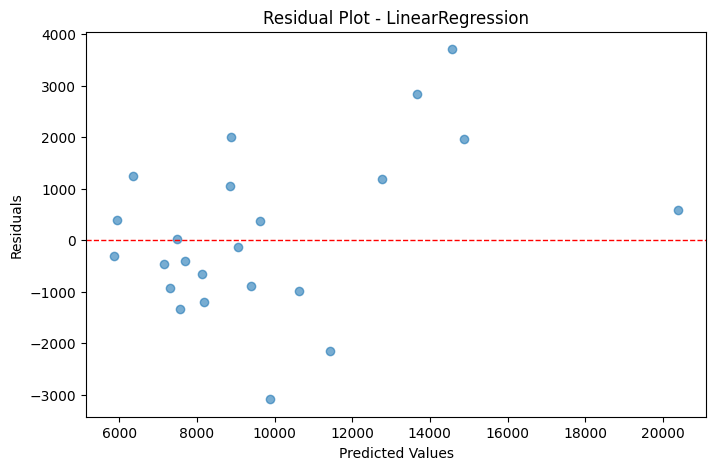

Model: RandomForestRegressor
R² Score: 0.840
MAE: 1194.257
------------------------------


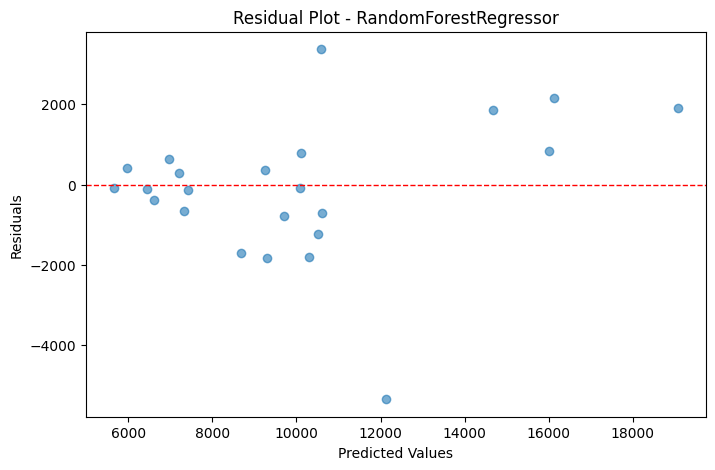

Model: GradientBoostingRegressor
R² Score: 0.789
MAE: 1179.560
------------------------------


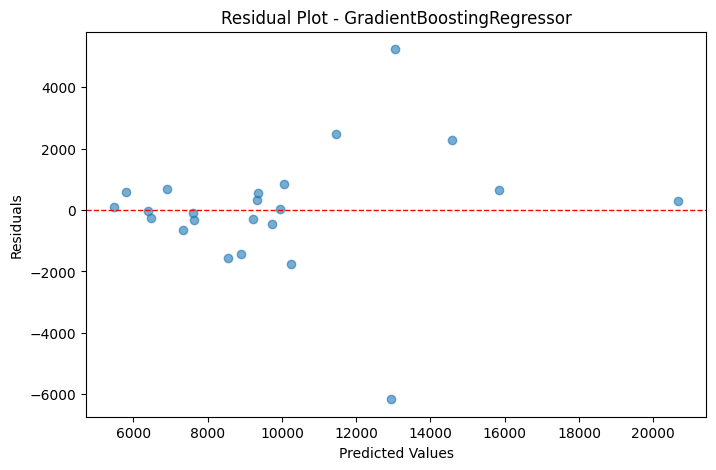

Model: Lasso
R² Score: 0.866
MAE: 1214.618
------------------------------


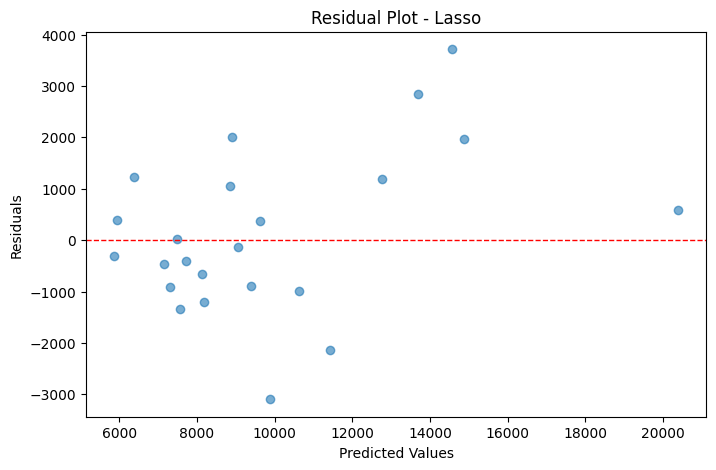

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation Metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Print Results
    print(f"Model: {model.__class__.__name__}")
    print(f"R² Score: {r2:.3f}")
    print(f"MAE: {mae:.3f}")
    print("-" * 30)

    # Plot Residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 5))
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
    plt.title(f"Residual Plot - {model.__class__.__name__}")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.show()

    return r2, mae


# Initialize Models
models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(random_state=42),
    # DecisionTreeRegressor(random_state=42),
    Lasso(alpha=0.1)  # Lasso Regression with regularization strength alpha
]

# Evaluate Each Model
results = {}
for model in models:
    r2, mae = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[model.__class__.__name__] = {"R²": r2, "MAE": mae}


We are using R2 as an evaluation metric to judge the best performing regression model.

R² (R-squared) is a valuable criterion when selecting a regression model because it measures how well the model explains the variance in the target variable. Essentially, it shows the proportion of the data’s variability that the model captures. This makes it easy to compare the performance of different models on the same dataset—models with higher R² scores are generally considered to be more accurate.

 Another advantage is that R² is scale-independent, which means it works across various types of regression models without being affected by the units of measurement.

 Only judging by R2 can mislead we have coupled it with MAE to get a good well-rounded decision.

# Picking the best two performing models

Model: LinearRegression
R² Score: 0.867
MAE: 1213.705
------------------------------
Model: RandomForestRegressor
R² Score: 0.840
MAE: 1194.257
------------------------------


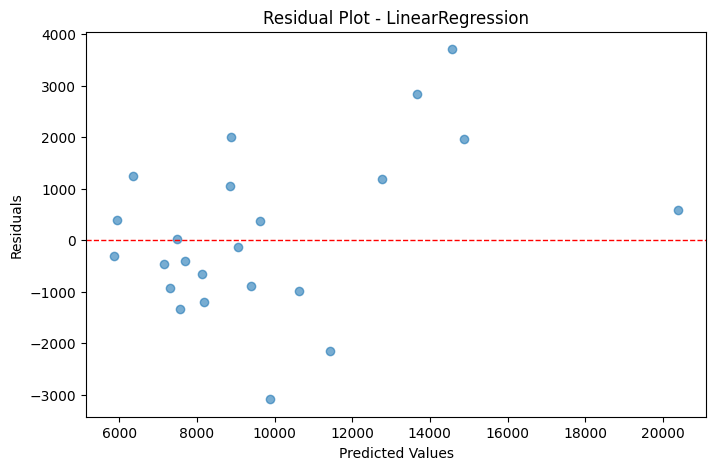

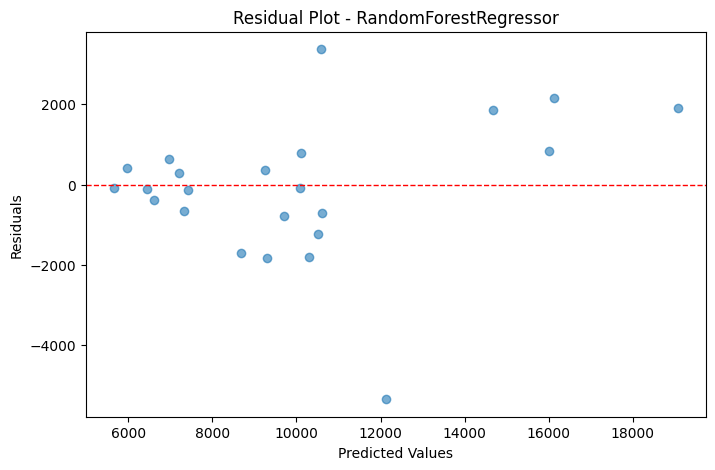

In [39]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation Metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Print Results
    print(f"Model: {model.__class__.__name__}")
    print(f"R² Score: {r2:.3f}")
    print(f"MAE: {mae:.3f}")
    print("-" * 30)

    # Plot Residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 5))
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
    plt.title(f"Residual Plot - {model.__class__.__name__}")
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
   # plt.show()

    return r2, mae
# Initialize Models
models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=100, random_state=42),
]

# Evaluate Each Model
results = {}
for model in models:
    r2, mae = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[model.__class__.__name__] = {"R²": r2, "MAE": mae}
